# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Zaid Alghifarry
- **Email:** limekor335@gmail.com
- **ID Dicoding:** blazblue40

## Menentukan Pertanyaan Bisnis

- Bagaimana penyewaan sepeda pada hari kerja dan akhir pekan di setiap musim?
- Bagaimana variasi jumlah penyewaan sepeda berdasarkan waktu penyewaan, dan disaat waktu kapan penyewaan sepeda paling ramai?

## Import Semua Packages/Library yang Digunakan

In [1]:
#@markdown Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

## Data Wrangling

### Gathering Data

>Tahap perolehan data yang digunakan untuk analisis.

In [2]:
#@markdown Download dataset

os.environ['KAGGLE_USERNAME'] = "fgfgfg333334"
os.environ['KAGGLE_KEY'] = "24e3a9b450813d932f22ea7b46c4653e"

!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

zip_file_path = "/content/bike-sharing-dataset.zip"
extract_folder_path = "/content/bike-sharing-dataset"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 82.0MB/s]


- hour.csv: Berisi jumlah pengguna sepeda yang diagregasi per jam.
- day.csv: Berisi jumlah pengguna sepeda yang diagregasi setiap hari.

### Assessing Data

> Tahap pengecekkan atau penilaian terhadap dataset.

#### Dataset Info





In [3]:
#@markdown Dataset Info

# 1. hour.csv
hourly_path = '/content/bike-sharing-dataset/hour.csv'
hourly_df = pd.read_csv(hourly_path)
print("Informasi dari hour.csv:")
print(hourly_df.info(), "\n")

# 2. daily.csv
daily_path = '/content/bike-sharing-dataset/day.csv'
daily_df = pd.read_csv(daily_path)
print("Informasi dari daily.csv:")
print(daily_df.info(), "\n")



Informasi dari hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None 

Informasi dari da

>- Kolom 'dteday' berjenis object. Seharusnya berjenis datetime karna berisi tanggal.
- Pada dataset tidak terdapat missing value.

In [4]:
#@markdown Lihat data

# 1. hour.csv
hourly_path = '/content/bike-sharing-dataset/hour.csv'
hourly_df = pd.read_csv(hourly_path)
print("hour.csv:")
print(hourly_df.head(), "\n")

# 2. day.csv
daily_path = '/content/bike-sharing-dataset/day.csv'
daily_df = pd.read_csv(daily_path)
print("day.csv:")
print(daily_df.head(), "\n")


hour.csv:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1   

day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0   

> - Beberapa data masih berbentuk biner. Akan mengkonversi dataset dengan memberi label yang sesuai berdasarkan deskripsi dataset (Readme.txt) agar mudah untuk dianalisis.
- Kolom instant berfungsi sebagai record index yang berisi urutan numerik dan tidak mengandung informasi yang relevan untuk analisis. Kolom ini akan dihapus.
- Kolom temp, atemp, hum, dan windspeed masih dalam bentuk normalisasi. Kolom ini akan di denormalisasi ke bentuk awal. Berdasarkan informasi dataset, berikut nilai yang akan digunakan untuk scaling masing-masing kolom:
  - temp x41
  - atemp x50
  - hum x100
  - windspeed x67


In [5]:

#@markdown Konversi dataset

# Konversi kolom season ke nama season
season_map = {
    1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}
hourly_df['season'] = hourly_df['season'].map(season_map)
daily_df['season'] = daily_df['season'].map(season_map)

# Konversi kolom yr ke nomor yr
yr_map = {
    0: '2011', 1: '2012'
}
hourly_df['yr'] = hourly_df['yr'].map(yr_map)
daily_df['yr'] = daily_df['yr'].map(yr_map)

# Konversi kolom mnth ke nama mnth
mnth_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
hourly_df['mnth'] = hourly_df['mnth'].map(mnth_map)
daily_df['mnth'] = daily_df['mnth'].map(mnth_map)

# Konversi kolom weathersit ke keteranga weathersit
weathersit_map = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog',
}
hourly_df['weathersit'] = hourly_df['weathersit'].map(weathersit_map)
daily_df['weathersit'] = daily_df['weathersit'].map(weathersit_map)

# Buat kolom 'day_type' berdasarkan kondisi
def determine_day_type(row):
    if row['weekday'] in [0, 6]:  # Cek apakah weekend
        return 1
    elif row['holiday'] == 1:  # Cek apakah holiday
        return 2
    elif row['workingday'] == 1:  # Cek apakah working day
        return 3
    else:
        return None  # Jika tidak memenuhi kondisi, kembalikan None (opsional)

# Terapkan fungsi ke dataset
hourly_df['day_type'] = hourly_df.apply(determine_day_type, axis=1)
daily_df['day_type'] = daily_df.apply(determine_day_type, axis=1)

# Konversi kolom weekday ke nama hari
weekday_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
hourly_df['weekday'] = hourly_df['weekday'].map(weekday_map)
daily_df['weekday'] = daily_df['weekday'].map(weekday_map)

# Konversi kolom day_type ke jenis hari
daytype_map = {
    1: 'Weekend', 2: 'Holiday', 3: 'Workingday'
}
hourly_df['day_type'] = hourly_df['day_type'].map(daytype_map)
daily_df['day_type'] = daily_df['day_type'].map(daytype_map)

# denormalisasi kolom temp, atemp, hum, dan windspeed
hourly_df['temp'] = hourly_df['temp'] * 41
daily_df['temp'] = daily_df['temp'] * 41
hourly_df['atemp'] = hourly_df['atemp'] * 50
daily_df['atemp'] = daily_df['atemp'] * 50
hourly_df['hum'] = hourly_df['hum'] * 100
daily_df['hum'] = daily_df['hum'] * 100
hourly_df['windspeed'] = hourly_df['windspeed'] * 67
daily_df['windspeed'] = daily_df['windspeed'] * 67

# hapus kolom irelevant
hourly_df.drop(columns=['instant', 'holiday','workingday'], inplace=True)
daily_df.drop(columns=['instant', 'holiday', 'workingday'], inplace=True)

print("hour.csv:")
print(hourly_df.head(), "\n")
print("day.csv:")
print(daily_df.head(), "\n")

hour.csv:
       dteday    season    yr     mnth  hr   weekday  \
0  2011-01-01  Springer  2011  January   0  Saturday   
1  2011-01-01  Springer  2011  January   1  Saturday   
2  2011-01-01  Springer  2011  January   2  Saturday   
3  2011-01-01  Springer  2011  January   3  Saturday   
4  2011-01-01  Springer  2011  January   4  Saturday   

                                        weathersit  temp   atemp   hum  \
0  Clear, Few clouds, Partly cloudy, Partly cloudy  9.84  14.395  81.0   
1  Clear, Few clouds, Partly cloudy, Partly cloudy  9.02  13.635  80.0   
2  Clear, Few clouds, Partly cloudy, Partly cloudy  9.02  13.635  80.0   
3  Clear, Few clouds, Partly cloudy, Partly cloudy  9.84  14.395  75.0   
4  Clear, Few clouds, Partly cloudy, Partly cloudy  9.84  14.395  75.0   

   windspeed  casual  registered  cnt day_type  
0        0.0       3          13   16  Weekend  
1        0.0       8          32   40  Weekend  
2        0.0       5          27   32  Weekend  
3        0.0

> Data-data pada kolom weathersit memiliki text yang cukup panjang. Maka akan disederhanakan.

In [6]:

#@markdown Penyederhanaan text di kolom weathersit
weathersit_map = {
    'Clear, Few clouds, Partly cloudy, Partly cloudy':'Clear, Partly cloudy',
    'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' : 'Mist, Cloudy',
    'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' : 'Light Snow, Light Rain, Thunderstorm',
    'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' : 'Heavy Rain, Ice Pellets, Snow, Fog',
}
hourly_df['weathersit'] = hourly_df['weathersit'].map(weathersit_map)
daily_df['weathersit'] = daily_df['weathersit'].map(weathersit_map)

print("hour.csv:")
print(hourly_df[['weathersit']].head())
print("day.csv:")
print(daily_df[['weathersit']].head())

hour.csv:
             weathersit
0  Clear, Partly cloudy
1  Clear, Partly cloudy
2  Clear, Partly cloudy
3  Clear, Partly cloudy
4  Clear, Partly cloudy
day.csv:
             weathersit
0          Mist, Cloudy
1          Mist, Cloudy
2  Clear, Partly cloudy
3  Clear, Partly cloudy
4  Clear, Partly cloudy


#### Cek Duplikasi





In [7]:
#@markdown Cek duplikasi

# Mengecek duplikasi di setiap file

# 1. hour.csv
print("Duplikasi hour.csv:")
print(hourly_df.duplicated().sum(), "\n")

# 2. day.csv
print("Duplikasi day.csv:")
print(daily_df.duplicated().sum(), "\n")

Duplikasi hour.csv:
0 

Duplikasi day.csv:
0 



> Pada dataset tidak terdapat duplikasi data.

#### Cek Deskripsi Statistik





In [8]:
#@markdown Cek deksripsi statistik
# 1. hour.csv
print("hour.csv:")
print(hourly_df.describe(), "\n")

# 2. day.csv
print("day.csv:")
print(daily_df.describe(), "\n")



hour.csv:
                 hr          temp         atemp           hum     windspeed  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean      11.546752     20.376474     23.788755     62.722884     12.736540   
std        6.914405      7.894801      8.592511     19.292983      8.196795   
min        0.000000      0.820000      0.000000      0.000000      0.000000   
25%        6.000000     13.940000     16.665000     48.000000      7.001500   
50%       12.000000     20.500000     24.240000     63.000000     12.998000   
75%       18.000000     27.060000     31.060000     78.000000     16.997900   
max       23.000000     41.000000     50.000000    100.000000     56.996900   

             casual    registered           cnt  
count  17379.000000  17379.000000  17379.000000  
mean      35.676218    153.786869    189.463088  
std       49.305030    151.357286    181.387599  
min        0.000000      0.000000      1.000000  
25%        4.000000     34.0

> Dari deskripsi statistik tidak ada anomali data atau data tidak logis.

#### Kesimpulan





- Secara keseluruhan dataset sudah bersih, namun hanya melakukan konversi bentuk data saja untuk kemudahan analisis.
- Tahap cleaning data akan mengubah format kolom 'dteday' menjadi datetime.

### Cleaning Data

> Tahap ini akan melakukan pembersihan data. Berdasarkan assessing data, data ini cukup dibersihkan dengan mengkonversi tipe data saja, yaitu pada kolom  'dteday'.

In [9]:
#@markdown Konversi tipe data

hourly_df['dteday'] = pd.to_datetime(hourly_df['dteday'])
daily_df['dteday'] = pd.to_datetime(daily_df['dteday'])

print("Informasi dari hour.csv:")
print(hourly_df.info(), "\n")

print("Informasi dari daily.csv:")
print(daily_df.info(), "\n")

Informasi dari hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   yr          17379 non-null  object        
 3   mnth        17379 non-null  object        
 4   hr          17379 non-null  int64         
 5   weekday     17379 non-null  object        
 6   weathersit  17379 non-null  object        
 7   temp        17379 non-null  float64       
 8   atemp       17379 non-null  float64       
 9   hum         17379 non-null  float64       
 10  windspeed   17379 non-null  float64       
 11  casual      17379 non-null  int64         
 12  registered  17379 non-null  int64         
 13  cnt         17379 non-null  int64         
 14  day_type    17379 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(4), o

## Exploratory Data Analysis (EDA)

> Tahap ini melakukan analisis data terhadap data hourly dan daily, kemudian memperoleh insight dari data nya.

### Eksplorasi Data Hourly

#### Data Hourly

In [10]:
#@markdown Melihat isi hourly_df

hourly_df

,dteday,season,yr,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_type
0,2011-01-01,Springer,2011,January,0,Saturday,"Clear, Partly cloudy",9.84,14.395,81.0,0.0000,3,13,16,Weekend
1,2011-01-01,Springer,2011,January,1,Saturday,"Clear, Partly cloudy",9.02,13.635,80.0,0.0000,8,32,40,Weekend
2,2011-01-01,Springer,2011,January,2,Saturday,"Clear, Partly cloudy",9.02,13.635,80.0,0.0000,5,27,32,Weekend
3,2011-01-01,Springer,2011,January,3,Saturday,"Clear, Partly cloudy",9.84,14.395,75.0,0.0000,3,10,13,Weekend
4,2011-01-01,Springer,2011,January,4,Saturday,"Clear, Partly cloudy",9.84,14.395,75.0,0.0000,0,1,1,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Springer,2012,December,19,Monday,"Mist, Cloudy",10.66,12.880,60.0,11.0014,11,108,119,Workingday
17375,2012-12-31,Springer,2012,December,20,Monday,"Mist, Cloudy",10.66,12.880,60.0,11.0014,8,81,89,Workingday
17376,2012-12-31,Springer,2012,December,21,Monday,"Clear, Partly cloudy",10.66,12.880,60.0,11.0014,7,83,90,Workingday
17377,2012-12-31,Springer,2012,December,22,Monday,"Clear, Partly cloudy",10.66,13.635,56.0,8.9981,13,48,61,Workingday


In [11]:
#@markdown Melihat rangkuman parameter statisktik
hourly_df.describe(include="all")

,dteday,season,yr,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_type
count,17379,17379,17379,17379,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,4,2,12,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Fall,2012,May,NaN,Saturday,"Clear, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workingday
freq,NaN,4496,8734,1488,NaN,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11865
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000,NaN
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000,NaN
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000,NaN


#### Insight Data Hourly

In [12]:
#@markdown Eksplorasi data perjam

# Assuming `hourly_df` is your DataFrame
# Agregasi berdasarkan season, weekday, weather, dan hari kerja
agg = {}

# Total count of rentals per season
agg['total_rentals_per_season'] = hourly_df.groupby('season')['cnt'].agg(['sum'])

# Average temperature, atemp, and humidity per season
agg['avg_weather_per_season'] = hourly_df.groupby('season').agg({
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean'
})

# Total rentals and average rentals per hour of the day
agg['rentals_per_hour'] = hourly_df.groupby('hr')['cnt'].agg(['sum', 'mean'])

# Total rentals per weekday (0: Sunday, 6: Saturday)
agg['rentals_per_weekday'] = hourly_df.groupby('weekday')['cnt'].agg(['sum', 'mean'])

# Count of rentals based on weather situation
agg['rentals_per_weather'] = hourly_df.groupby('weathersit')['cnt'].agg(['sum', 'mean'])

# Count of rentals by holiday or workingday type (weekend, workingday)
agg['rentals_per_day_type'] = hourly_df.groupby('day_type')['cnt'].agg(['sum', 'mean'])

# Count of rentals by year
agg['rentals_per_year'] = hourly_df.groupby('yr')['cnt'].agg(['sum', 'mean'])

# Display all the insights
for key, value in agg.items():
    print(f"{key}")
    print(value)
    print("\n" + "-"*50 + "\n")


total_rentals_per_season
              sum
season           
Fall      1061129
Springer   471348
Summer     918589
Winter     841613

--------------------------------------------------

avg_weather_per_season
               temp      atemp        hum
season                                   
Fall      28.962816  32.800176  63.316726
Springer  12.265012  14.905824  58.134842
Summer    22.331191  26.027347  62.702200
Winter    17.348658  20.786887  66.712429

--------------------------------------------------

rentals_per_hour
       sum        mean
hr                    
0    39130   53.898072
1    24164   33.375691
2    16352   22.869930
3     8174   11.727403
4     4428    6.352941
5    14261   19.889819
6    55132   76.044138
7   154171  212.064649
8   261001  359.011004
9   159438  219.309491
10  126257  173.668501
11  151320  208.143054
12  184414  253.315934
13  184919  253.661180
14  175652  240.949246
15  183149  251.233196
16  227748  311.983562
17  336860  461.452055
18  30977

1. **Total Penyewaan Sepeda per Musim:**<br>Penyewaan sepeda tertinggi terjadi pada musim Fall (1061129), diikuti oleh Summer (918589), Winter (841613), dan Springer (471348).
2. **Rata-rata Cuaca per Musim:**<br>Musim Fall memiliki suhu rata-rata tertinggi (28.96°C) dan kelembapan rendah (63.32%), sementara Springer memiliki suhu lebih rendah (12.27°C) dan kelembapan relatif tinggi (58.13%).
3. **Penyewaan Sepeda per Jam:**<br>Penyewaan sepeda tertinggi terjadi pada jam 17 (336,860 penyewaan), dengan rata-rata sekitar 461 penyewaan/jam.
Jam 4 (4428 penyewaan) mencatatkan angka penyewaan terendah.
4. **Penyewaan Sepeda per Hari dalam Seminggu:**<br>Penyewaan tertinggi terjadi pada Friday (487,790), Thursday (485,395), dan Monday (455,503).
Sunday mencatatkan penyewaan terendah di antara hari kerja lainnya (444,027).

5. **Penyewaan Sepeda per Cuaca:**<br>Cuaca Clear, Partly cloudy menghasilkan jumlah penyewaan tertinggi (2,338,173 penyewaan), dengan rata-rata 204 penyewaan/jam.
Heavy Rain, Ice Pellets, Snow, Fog memiliki penyewaan sangat rendah (hanya 223 penyewaan).

6. **Penyewaan Sepeda per Tipe Hari:**<br>Hari Kerja (Workingday) memiliki jumlah penyewaan tertinggi (2,292,410), diikuti oleh Weekend (921,834), dan Holiday (78,435).

7. **Penyewaan Sepeda per Tahun:**<br>Pada tahun 2012, terjadi peningkatan signifikan dalam jumlah penyewaan sepeda (2,049,576), dibandingkan dengan 2011 (1,243,103).

### Eksplorasi Data Daily

#### Data Daily

In [13]:
#@markdown Melihat isi daily_df

daily_df

,dteday,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_type
0,2011-01-01,Springer,2011,January,Saturday,"Mist, Cloudy",14.110847,18.18125,80.5833,10.749882,331,654,985,Weekend
1,2011-01-02,Springer,2011,January,Sunday,"Mist, Cloudy",14.902598,17.68695,69.6087,16.652113,131,670,801,Weekend
2,2011-01-03,Springer,2011,January,Monday,"Clear, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349,Workingday
3,2011-01-04,Springer,2011,January,Tuesday,"Clear, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562,Workingday
4,2011-01-05,Springer,2011,January,Wednesday,"Clear, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600,Workingday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,Springer,2012,December,Thursday,"Mist, Cloudy",10.420847,11.33210,65.2917,23.458911,247,1867,2114,Workingday
727,2012-12-28,Springer,2012,December,Friday,"Mist, Cloudy",10.386653,12.75230,59.0000,10.416557,644,2451,3095,Workingday
728,2012-12-29,Springer,2012,December,Saturday,"Mist, Cloudy",10.386653,12.12000,75.2917,8.333661,159,1182,1341,Weekend
729,2012-12-30,Springer,2012,December,Sunday,"Clear, Partly cloudy",10.489153,11.58500,48.3333,23.500518,364,1432,1796,Weekend


In [14]:
#@markdown Melihat rangkuman parameter statisktik
daily_df.describe(include="all")

,dteday,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_type
count,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,4,2,12,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Fall,2012,January,Saturday,"Clear, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workingday
freq,NaN,188,366,62,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,NaN


#### Insight Data Hourly

In [15]:
#@markdown Insight data harian

# Assuming `daily_df` is your DataFrame
# Agregasi berdasarkan berbagai kategori untuk mendapatkan insight dari data daily bike sharing

insights = {}

# Total count of rentals per season
insights['total_rentals_per_season'] = daily_df.groupby('season')['cnt'].agg(['sum'])

# Average temperature, atemp, and humidity per season
insights['avg_weather_per_season'] = daily_df.groupby('season').agg({
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean'
})

# Total rentals and average rentals per month
insights['rentals_per_month'] = daily_df.groupby('mnth')['cnt'].agg(['sum', 'mean'])

# Total rentals per weekday (e.g., weekend vs. working day)
insights['rentals_per_weekday'] = daily_df.groupby('weekday')['cnt'].agg(['sum', 'mean'])

# Count of rentals based on weather situation
insights['rentals_per_weather'] = daily_df.groupby('weathersit')['cnt'].agg(['sum', 'mean'])

# Count of rentals by day type (workingday, weekend)
insights['rentals_per_day_type'] = daily_df.groupby('day_type')['cnt'].agg(['sum', 'mean'])

# Total rentals per year
insights['rentals_per_year'] = daily_df.groupby('yr')['cnt'].agg(['sum', 'mean'])


# Display all the insights
for key, value in insights.items():
    print(f"{key}")
    print(value)
    print("\n" + "-"*50 + "\n")


total_rentals_per_season
              sum
season           
Fall      1061129
Springer   471348
Summer     918589
Winter     841613

--------------------------------------------------

avg_weather_per_season
               temp      atemp        hum
season                                   
Fall      28.958682  32.794920  63.348206
Springer  12.207650  14.845697  58.290291
Summer    22.320611  26.015366  62.694833
Winter    17.339148  20.776937  66.871917

--------------------------------------------------

rentals_per_month
              sum         mean
mnth                          
April      269094  4484.900000
August     351194  5664.419355
December   211036  3403.806452
February   151352  2655.298246
January    134933  2176.338710
July       344948  5563.677419
June       346342  5772.366667
March      228920  3692.258065
May        331686  5349.774194
November   254831  4247.183333
October    322352  5199.225806
September  345991  5766.516667

---------------------------------

**Data hourly dan data daily memiliki data yang sama, kecuali dua insight berikut:**

1. **Penyewaan Sepeda per Bulan:**<br>Bulan dengan penyewaan tertinggi adalah August (351,194), July (344,948), dan September (345,991), dengan rata-rata penyewaan di bulan tersebut lebih dari 5,000 penyewaan per hari.
January dan February mencatatkan jumlah penyewaan lebih rendah (rata-rata sekitar 2,500 per hari).

2. **Penyewaan Sepeda per Hari dalam Seminggu:**<br>Penyewaan tertinggi terjadi pada Friday (487,790) dan Thursday (485,395), dengan rata-rata lebih dari 4,600 penyewaan per hari.
Sunday mencatatkan jumlah penyewaan terendah di antara hari kerja lainnya (444,027).

## Visualization, Explanatory Analysis & Analisis Lanjutan

> Tahap ini akan menjawab pertanyaan bisnis, dengan memvisualisasikan, menganalisis, serta memperoleh insight dari jawabannya.

### Pertanyaan 1

> Bagaimana penyewaan sepeda pada hari kerja dan akhir pekan di setiap musim?

- Pertanyaan ini berfokus pada tipe hari (weekend dan workingday) dan musim.
- Pertanyaan ini melibatkan kolom 'day_type' weekend dan workingday serta kolom 'season'.
- Teknik analisis lanjutan clustering: grouping akan diterapkan pada kolom 'season' dan 'day_type', untuk mengelompokkan penyewaan sepeda berdasarkan musim dan jenis hari (hari kerja atau akhir pekan).

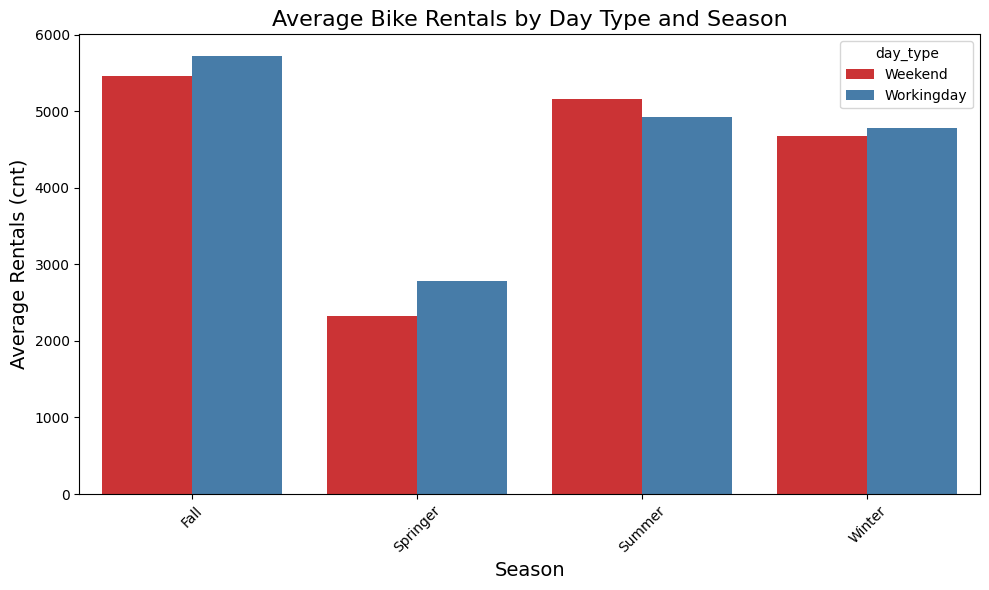

In [16]:
#@markdown Visualisasi

# Grouping data berdasarkan hari kerja vs akhir pekan dan musim
daily_df['day_type'] = daily_df['day_type'].map({'Workingday': 'Workingday', 'Weekend': 'Weekend'})

# Grouping berdasarkan musim dan tipe hari (Weekend/Workingday)
grouped_data = daily_df.groupby(['season', 'day_type'])['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', hue='day_type', data=grouped_data, palette='Set1')
plt.title('Average Bike Rentals by Day Type and Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Rentals (cnt)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Insight**:
- Pada musim gugur (Fall), penyewaan sepeda memiliki tingkat penyewaan tertinggi dibanding musim lainnya dengan penyewaan yang tinggi pada hari kerja dibandingkan akhir pekan.
- Di musim semi (Springer), penyewaan sepeda baik pada hari kerja dan akhir pekan memiliki penyewaan terendah dibanding musim lainnya.
- Pada musim panas (Summer), penyewaan sedikit lebih tinggi pada akhir pekan dibandingkan hari kerja, mungkin dipengaruhi oleh cuaca panas.
- Di musim dingin (Winter), perbedaan tingkat penyewaan sepeda di hari kerja dan akhir pekan memiliki nilai terkecil dari seluruh musim.
- Pada musim gugur dan musim dingin, pengelola toko sepeda dapat bisa fokus pada hari kerja karena penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.
- Pada musim gugur, pengelola sewa sepeda dapat menyesuaikan jumlah sepeda yang tersedia sesuai dengan kebutuhan yang lebih rendah.







### Pertanyaan 2

>Bagaimana variasi jumlah penyewaan sepeda berdasarkan waktu penyewaan, dan disaat waktu kapan penyewaan sepeda paling ramai?

- Pertanyaan ini berfokus pada waktu dan jumlah penyewaan sepeda.
- Pertanyaan ini melibatkan kolom 'hr', 'cnt', dan teknik analisis lanjutan clustering: binning.
- Teknik analisis lanjutan clustering: binning akan diterapkan pada kolom 'hr', untuk mengelompokkan waktu penyewaan sepeda ke dalam beberapa rentang waktu tertentu berdasarkan jam, seperti pagi, siang, sore, malam, dan tengah malam. Pembagian rentang waktu menggunakan rentang yang umum digunakan yaitu:
  - Pagi (06:00-10:00)
  - Siang (10:00-14:00)
  - Sore (14:00-16:00)
  - Malam (18:00-22:00)
  - Tengah Malam (22:00-06:00)

<ipython-input-17-fa5c868b1490>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='time_bin', y='cnt', palette=colors)


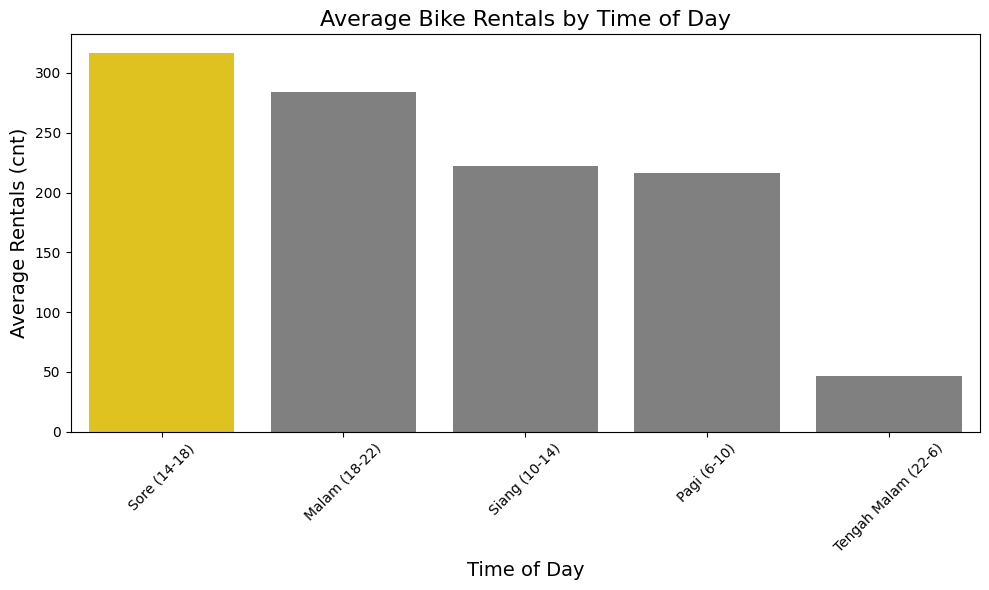

In [17]:
#@markdown Visualisasi

# Binning waktu penyewaan (hr) menjadi rentang waktu
def bin_time(hr):
    if 6 <= hr < 10:
        return 'Pagi (6-10)'
    elif 10 <= hr < 14:
        return 'Siang (10-14)'
    elif 14 <= hr < 18:
        return 'Sore (14-18)'
    elif 18 <= hr < 22:
        return 'Malam (18-22)'
    else:
        return 'Tengah Malam (22-6)'

hourly_df['time_bin'] = hourly_df['hr'].apply(bin_time)

# Grouping data untuk menghitung rata-rata penyewaan per rentang waktu
grouped = hourly_df.groupby('time_bin')['cnt'].mean().reset_index()
grouped = grouped.sort_values(by='cnt', ascending=False)  # Sort untuk visualisasi

# Menentukan warna manual berdasarkan kategori 'time_bin'
highlight_color = 'gold'  # Warna untuk kategori utama (Sore)
neutral_color = 'gray'    # Warna untuk kategori lain

# Membuat daftar warna untuk setiap kategori
colors = [highlight_color if bin == 'Sore (14-18)' else neutral_color for bin in grouped['time_bin']]

# Visualisasi dengan warna yang disesuaikan
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='time_bin', y='cnt', palette=colors)
plt.title('Average Bike Rentals by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Average Rentals (cnt)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




> **Insight**:
- Penyewaan sepeda tertinggi yaitu pada sore hari dengan jumlah 316 penyewa, diikuti oleh malam hari 283 penyewa, siang hari 223 penyewa, pagi hari 216 penyewa, dan tengah malam 46 penyewa.
- Pengelola toko sepeda dapat memfokuskan pelayanan dan jumlah sepeda untuk sore hingga malam hari.
- Pengelola toko sepeda dapat mengadakan promosi khusus untuk meningkatkan penyewaan pada periode Tengah Malam untuk memanfaatkan waktu sepi.







## Conclusion

>**Conclution pertanyaan 1**:<br>
Berdasarkan analisis penyewaan sepeda pada hari kerja dan akhir pekan di setiap musim, pada musim gugur (Fall) memiliki penyewaan sepeda tertinggi, dengan lebih banyak penyewaan pada hari kerja dibandingkan akhir pekan. Sebaliknya, musim semi (Spring) menunjukkan penyewaan sepeda yang lebih rendah baik pada hari kerja maupun akhir pekan. Musim panas (Summer) menunjukkan sedikit peningkatan pada akhir pekan, kemungkinan karena cuaca yang lebih panas, sementara musim dingin (Winter) menunjukkan perbedaan yang sangat kecil antara hari kerja dan akhir pekan. Berdasarkan temuan ini, pengelola dapat memfokuskan penyediaan sepeda lebih banyak pada hari kerja selama musim gugur dan musim dingin, serta menyesuaikan jumlah sepeda di musim gugur untuk menanggapi penurunan permintaan.


> **Conclution pertanyaan 2**<br>
Dari analisis variasi jumlah penyewaan sepeda berdasarkan waktu, dapat disimpulkan bahwa puncak penyewaan sepeda terjadi pada sore hari, dengan jumlah 316 penyewa, diikuti oleh malam hari (283 penyewa), siang hari (223 penyewa), pagi hari (216 penyewa), dan tengah malam yang paling rendah (46 penyewa). Insight ini menunjukkan bahwa pengelola toko sepeda sebaiknya memfokuskan pelayanan dan penyediaan sepeda pada sore hingga malam hari, di mana permintaan tertinggi. Selain itu, untuk memanfaatkan waktu sepi, pengelola dapat mempertimbangkan untuk menawarkan promosi khusus pada periode tengah malam guna meningkatkan jumlah penyewaan di waktu tersebut.